<a href="https://colab.research.google.com/github/NarenneraN/DL/blob/main/05_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('homeprices_banglore.csv')

In [4]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
X=df[['area','bedrooms']]

In [6]:
Y=df[['price']]

In [7]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(X)
scaled_Y = sy.fit_transform(Y)

In [9]:
scaled_X[:3]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ]])

In [10]:
X.shape

(20, 2)

In [14]:
X.shape[1]

2

In [15]:
np.ones(shape=(2))

array([1., 1.])

In [16]:
np.ones(shape=(2)).shape

(2,)

In [19]:
scaled_X.T.shape

(2, 20)

In [24]:
scaled_Y.shape

(20, 1)

In [26]:
scaled_X.shape

(20, 2)

In [20]:
def bgd(X,Y,epochs,lr=0.01):
  features=X.shape[1]
  w=np.ones(shape=(features)) # Weight matrix = 1 -> (feat,1)
  b=0
  n=X.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):
    y_pred=np.dot(w,scaled_X.T)+b # y=wx+b

    w_deriv = -(2/n)*(X.T.dot(Y-y_pred))
    b_deriv = -(2/n)*np.sum(Y-y_pred)

    w = w - lr*w_deriv
    b = b - lr*b_deriv

    cost_fn = np.mean(np.square(Y-y_pred))
    cost_list.append(cost_fn)
    epoch_list.append(i)

  return w,b,cost_list,epoch_list

[0.70712464 0.67456527]
-0.23034857438407427
0.0068641890429808105


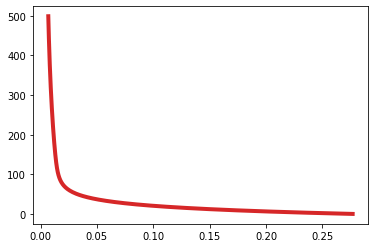

In [28]:
w,b,cost_list,epoch_list = bgd(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500,0.01)
plt.plot(cost_list,epoch_list,color='tab:red',linewidth=4)
print(w)
print(b)
print(cost_list[len(cost_list)-1])

In [44]:
def predict(x1,x2,w,b):
  scaled_x=sx.transform([[x1,x2]])
  x1=scaled_x[0][0]
  x2=scaled_x[0][1]
  w1=w[0]
  w2=w[1]
  ans=w1*x1+w2*x2+b
  return sy.inverse_transform([[ans]])
print(predict(2600,4,w,b))

[[128.45484403]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [45]:
print(predict(1000,2,w,b))

[[30.25309446]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
